## Import necessary libraries

In [ ]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Create dataset from spectogram image folder

**Define the path of preprocessed spectogram image folder**

In [ ]:
path_of_the_directory = 'Preprocessed Spectogram Folder Path'

**Show an example of spectogram image**

(94, 125, 3)
['2', '4', '9', '3', '7', '0', '1', '5', '6', '8']


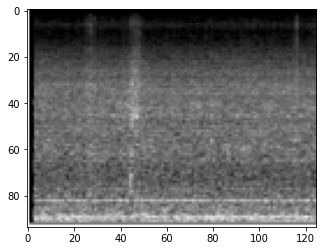

In [ ]:
img = cv.imread(path_of_the_directory+"/0/100852-0-0-0.png")
plt.imshow(img)
print(img.shape)
shape = img.shape
print(os.listdir(path_of_the_directory))

**Create dataset from spectogram folder with corresponding classes**

In [ ]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path= os.path.join(img_folder, dir1, file)
            image= cv.imread(image_path)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(int(dir1))
    return img_data_array, class_name

**Init the dataset and shuffle**

In [ ]:
# extract the image array and class name
img_data, class_name =create_dataset(path_of_the_directory)


In [ ]:
data = [img_data, class_name]
np.random.shuffle(data)

**Split the dataset into train, validation and test sets with ratio 8:1:1**

In [ ]:
# split the data into train,test,validation
X_train, X_rem, y_train, y_rem = train_test_split(data[0], data[1], test_size=0.2)

#split the test data into test and validation with 0.5 ratio
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

## Model Phase

In [ ]:
model = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=shape),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Conv2D(filters=16, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Dropout(0.7),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'],)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
history = model.fit(np.array(X_train), np.array(y_train), epochs=100, validation_data=(np.array(X_valid), np.array(y_valid)), callbacks=[callback])

Epoch 1/100
219/219 [==============================] - 14s 10ms/step - loss: 2.0727 - accuracy: 0.2332 - val_loss: 1.8413 - val_accuracy: 0.3998
Epoch 2/100
219/219 [==============================] - 2s 8ms/step - loss: 1.7644 - accuracy: 0.3735 - val_loss: 1.6366 - val_accuracy: 0.4227
Epoch 3/100
219/219 [==============================] - 2s 9ms/step - loss: 1.6315 - accuracy: 0.4127 - val_loss: 1.5443 - val_accuracy: 0.4548
Epoch 4/100
219/219 [==============================] - 2s 8ms/step - loss: 1.5441 - accuracy: 0.4435 - val_loss: 1.4674 - val_accuracy: 0.4937
Epoch 5/100
219/219 [==============================] - 2s 8ms/step - loss: 1.4490 - accuracy: 0.4859 - val_loss: 1.3853 - val_accuracy: 0.5166
Epoch 6/100
219/219 [==============================] - 2s 8ms/step - loss: 1.3747 - accuracy: 0.5148 - val_loss: 1.3442 - val_accuracy: 0.5189
Epoch 7/100
219/219 [==============================] - 2s 8ms/step - loss: 1.3156 - accuracy: 0.5443 - val_loss: 1.2388 - val_accuracy: 0.55

## Evaluation

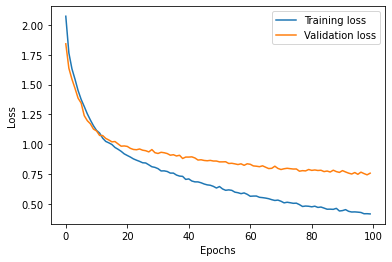

In [ ]:
# Plot the the training loss
plt.plot(history.history['loss'], label='Training loss')

# Plot the the validation loss
plt.plot(history.history['val_loss'], label='Validation loss')


# Name the x and y axises
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Put legend table
plt.legend()

# Show the plot
plt.show()

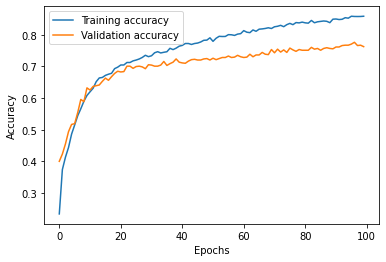

In [ ]:
# Plot the the training accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')

# Plot the the validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation accuracy')

# Name the x and y axises
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Put legend table
plt.legend()


# Show the plot
plt.show()

In [ ]:
model.evaluate(np.array(X_test), np.array(y_test))

28/28 [==============================] - 0s 6ms/step - loss: 0.6704 - accuracy: 0.8055


[0.6703845858573914, 0.8054919838905334]